# Guided Project : Visualizing The Gender Gap In College Degrees

A solution to this project can be found __[here](https://github.com/dataquestio/solutions/blob/master/Mission149Solutions.ipynb)__

We will now extend the work to include generation of line charts to compare the gender gap across all degree categories. We will also learn how to export the final diagram we create  as an image file.

There are 18 total columns in `women_degrees`. One column contains information of the year and each of the other 17 represent data for a given major. Since there are 17 degrees, we'll group the degrees into 3 different categories: STEM, liberal arts, and other. In this analysis we will include Psychology in the analysis with the STEM degrees.

In [1]:
%matplotlib inline
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt

In [2]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0, 107/255, 164/255)
cb_bright_orange = (1, 128/255, 14/255)

for col in women_degrees.columns:
    print(col)

print('\n')
print(len(women_degrees.columns))

Year
Agriculture
Architecture
Art and Performance
Biology
Business
Communications and Journalism
Computer Science
Education
Engineering
English
Foreign Languages
Health Professions
Math and Statistics
Physical Sciences
Psychology
Public Administration
Social Sciences and History


18


In [3]:
stem_cols = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics', 'Physical Sciences', 'Psychology']
women_stem = women_degrees[stem_cols]
print(women_stem.head())

lib_arts_cols = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
women_lib_arts = women_degrees[lib_arts_cols]

other_cols = ['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']
women_other = women_degrees[other_cols]

     Biology  Computer Science  Engineering  Math and Statistics  \
0  29.088363              13.6          0.8                 38.0   
1  29.394403              13.6          1.0                 39.0   
2  29.810221              14.9          1.2                 40.2   
3  31.147915              16.4          1.6                 40.9   
4  32.996183              18.9          2.2                 41.8   

   Physical Sciences  Psychology  
0               13.8        44.4  
1               14.9        46.2  
2               14.8        47.6  
3               16.5        50.4  
4               18.2        52.6  


In [4]:
# To sort ending gender gap for STEM:
gender_gap_stem = {}
for i in range(0, 6):
    gender_gap = abs(women_stem.iloc[-1, i]-(100-women_stem.iloc[-1, i]))
    gender_gap = '{:0.2f}'.format(gender_gap)
    gender_gap_stem[stem_cols[i]] = gender_gap
    
gg_stem_sorted = sorted(gender_gap_stem.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
print(gg_stem_sorted)
print('\n')

stem_cats = []
for sublist in gg_stem_sorted:
    degree = sublist[0]
    stem_cats.append(degree)
print(stem_cats)

[('Engineering', '65.00'), ('Computer Science', '63.60'), ('Psychology', '53.40'), ('Physical Sciences', '19.80'), ('Biology', '17.48'), ('Math and Statistics', '13.80')]


['Engineering', 'Computer Science', 'Psychology', 'Physical Sciences', 'Biology', 'Math and Statistics']


In [5]:
# To sort ending gender gap for Liberal Arts:
gender_gap_lib_arts = {}
for i in range(0, 5):
    gender_gap = abs(women_lib_arts.iloc[-1, i]-(100-women_lib_arts.iloc[-1, i]))
    gender_gap = '{:0.2f}'.format(gender_gap)
    gender_gap_lib_arts[lib_arts_cols[i]] = gender_gap
    
gg_lib_arts_sorted = sorted(gender_gap_lib_arts.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
print(gg_lib_arts_sorted)
print('\n')

lib_arts_cats = []
for sublist in gg_lib_arts_sorted:
    degree = sublist[0]
    lib_arts_cats.append(degree)
print(lib_arts_cats)

[('Foreign Languages', '39.00'), ('English', '36.85'), ('Communications and Journalism', '24.40'), ('Art and Performance', '22.40'), ('Social Sciences and History', '1.60')]


['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']


In [6]:
# To sort ending gender gap for Other:
gender_gap_other = {}
for i in range(0, 6):
    gender_gap = abs(women_other.iloc[-1, i]-(100-women_other.iloc[-1, i]))
    gender_gap = '{:0.2f}'.format(gender_gap)
    gender_gap_other[other_cols[i]] = gender_gap
    
gg_other_sorted = sorted(gender_gap_other.items(), key=lambda x:(x[1], x[0]), reverse=True)
print(gg_other_sorted)
print('\n')

other_cats = []
for sublist in gg_other_sorted:
    degree = sublist[0]
    other_cats.append(degree)
print(other_cats)

[('Health Professions', '69.60'), ('Public Administration', '63.80'), ('Education', '58.87'), ('Business', '3.64'), ('Architecture', '14.45'), ('Agriculture', '0.07')]


['Health Professions', 'Public Administration', 'Education', 'Business', 'Architecture', 'Agriculture']


For some inexplicable reason, when sorting the `women_other` data, `Business` is being sorted as having a greater gender gap than `Architecture`, but this is clearly untrue since the calculated gender gap is 3.64 for `Business` and 14.4 for `Architecture`. This is confirmed below. Therefore, we are required to redefine `other_cats` and sort the columns ourselves. 

In [7]:
# Confirm gender gap in Business is less than gender gap in Architecture
print(women_other.tail())
print('\n')
# Business - index 4 in women_other
bus_w = women_other.iloc[-1, 4]
bus_m = 100 - women_other.iloc[-1, 4]
print('Business')
print(bus_w)
print(bus_m)
print(abs(bus_w - bus_m))
print('\n')

# Architecture - index 5 in women_other
arch_w = women_other.iloc[-1, 5]
arch_m = 100 - women_other.iloc[-1, 5]
print('Architecture')
print(arch_w)
print(arch_m)
print(abs(arch_w - arch_m))
print('\n')

    Health Professions  Public Administration  Education  Agriculture  \
37                85.4                   82.1  78.721413    47.605026   
38                85.2                   81.7  79.196327    47.570834   
39                85.1                   82.0  79.532909    48.667224   
40                85.0                   81.7  79.618625    48.730042   
41                84.8                   81.9  79.432812    50.037182   

     Business  Architecture  
37  49.000459     43.100459  
38  48.888027     42.711730  
39  48.840474     43.348921  
40  48.757988     42.066721  
41  48.180418     42.773438  


Business
48.18041792
51.81958208
3.639164160000007


Architecture
42.7734375
57.2265625
14.453125




In [8]:
# Redefine other_cats by hand in order of greatest gender gap to least
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Architecture', 'Business', 'Agriculture']

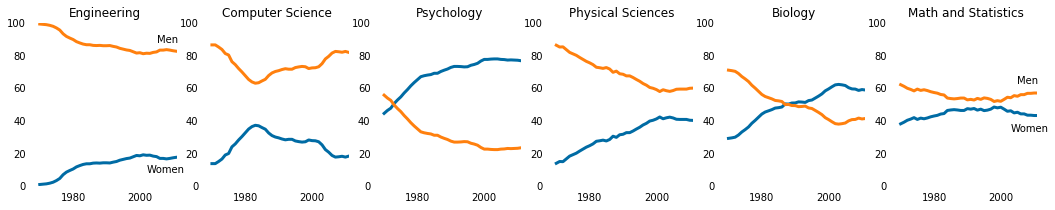

In [9]:
fig = plt.figure(figsize = (18,3))

for i in range(0,6):
    ax = fig.add_subplot(1, 6, i+1)
    ax.plot(women_degrees['Year'], women_stem[stem_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_stem[stem_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if i==5:
        ax.text(2005, 63, 'Men')
        ax.text(2003, 33, 'Women') 
    elif i==0:
        ax.text(2005, 88, 'Men')
        ax.text(2002, 8, 'Women')
        
plt.show()

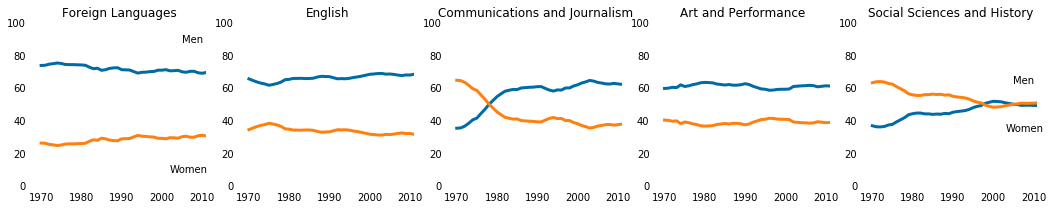

In [10]:
fig = plt.figure(figsize = (18,3))

for i in range(0,5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.plot(women_degrees['Year'], women_lib_arts[lib_arts_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_lib_arts[lib_arts_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if i==4:
        ax.text(2005, 63, 'Men')
        ax.text(2003, 33, 'Women') 
    elif i==0:
        ax.text(2005, 88, 'Men')
        ax.text(2002, 8, 'Women')
        
plt.show()

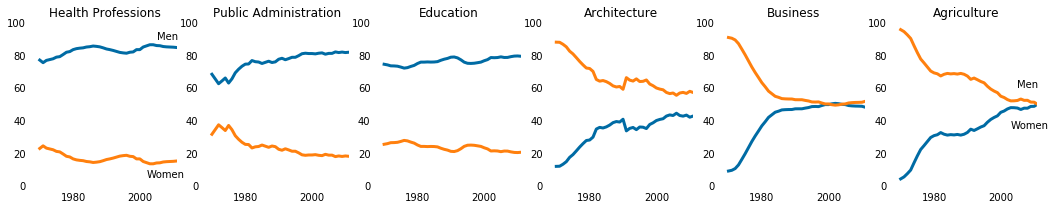

In [11]:
fig = plt.figure(figsize = (18,3))

for i in range(0,6):
    ax = fig.add_subplot(1, 6, i+1)
    ax.plot(women_degrees['Year'], women_other[other_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_other[other_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if i==5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women') 
    elif i==0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')
        
plt.show()

Now we'll generate a figure containing all of the line charts and arrange them (within their distict categories) from most degrees awarded to women to least in 2011.

As an extra precaution we will also print the last line of each of the data sets to check that the values in the sorted dictionary are correct. 

In [12]:
print(women_stem.tail(1), '\n')
# To sort most degrees awarded to women for STEM:
w_2011_stem = {}
for i in range(0, 6):
    w_2011 = women_stem.iloc[-1, i]
    w_2011 = '{:0.2f}'.format(w_2011)
    w_2011_stem[stem_cols[i]] = w_2011
    
w_stem_sorted = sorted(w_2011_stem.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
print(w_stem_sorted)
print('\n')

w_stem_cats = []
for sublist in w_stem_sorted:
    degree = sublist[0]
    w_stem_cats.append(degree)
print(w_stem_cats)

      Biology  Computer Science  Engineering  Math and Statistics  \
41  58.742397              18.2         17.5                 43.1   

    Physical Sciences  Psychology  
41               40.1        76.7   

[('Psychology', '76.70'), ('Biology', '58.74'), ('Math and Statistics', '43.10'), ('Physical Sciences', '40.10'), ('Computer Science', '18.20'), ('Engineering', '17.50')]


['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']


In [13]:
print(women_lib_arts.tail(1), '\n')
# To sort most degrees awarded to women for liberal arts:
w_2011_lib_arts = {}
for i in range(0, 5):
    w_2011 = women_lib_arts.iloc[-1, i]
    w_2011 = '{:0.2f}'.format(w_2011)
    w_2011_lib_arts[lib_arts_cols[i]] = w_2011
    
w_lib_arts_sorted = sorted(w_2011_lib_arts.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
print(w_lib_arts_sorted)
print('\n')

w_lib_arts_cats = []
for sublist in w_lib_arts_sorted:
    degree = sublist[0]
    w_lib_arts_cats.append(degree)
print(w_lib_arts_cats)

    Foreign Languages   English  Communications and Journalism  \
41               69.5  68.42673                           62.2   

    Art and Performance  Social Sciences and History  
41                 61.2                         49.2   

[('Foreign Languages', '69.50'), ('English', '68.43'), ('Communications and Journalism', '62.20'), ('Art and Performance', '61.20'), ('Social Sciences and History', '49.20')]


['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']


In [14]:
print(women_other.tail(1), '\n')
# To sort most degrees awarded to women for other:
w_2011_other = {}
for i in range(0, 6):
    w_2011 = women_other.iloc[-1, i]
    w_2011 = '{:0.2f}'.format(w_2011)
    w_2011_other[other_cols[i]] = w_2011
    
w_other_sorted = sorted(w_2011_other.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
print(w_other_sorted)
print('\n')

w_other_cats = []
for sublist in w_other_sorted:
    degree = sublist[0]
    w_other_cats.append(degree)
print(w_other_cats)

    Health Professions  Public Administration  Education  Agriculture  \
41                84.8                   81.9  79.432812    50.037182   

     Business  Architecture  
41  48.180418     42.773438   

[('Health Professions', '84.80'), ('Public Administration', '81.90'), ('Education', '79.43'), ('Agriculture', '50.04'), ('Business', '48.18'), ('Architecture', '42.77')]


['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']


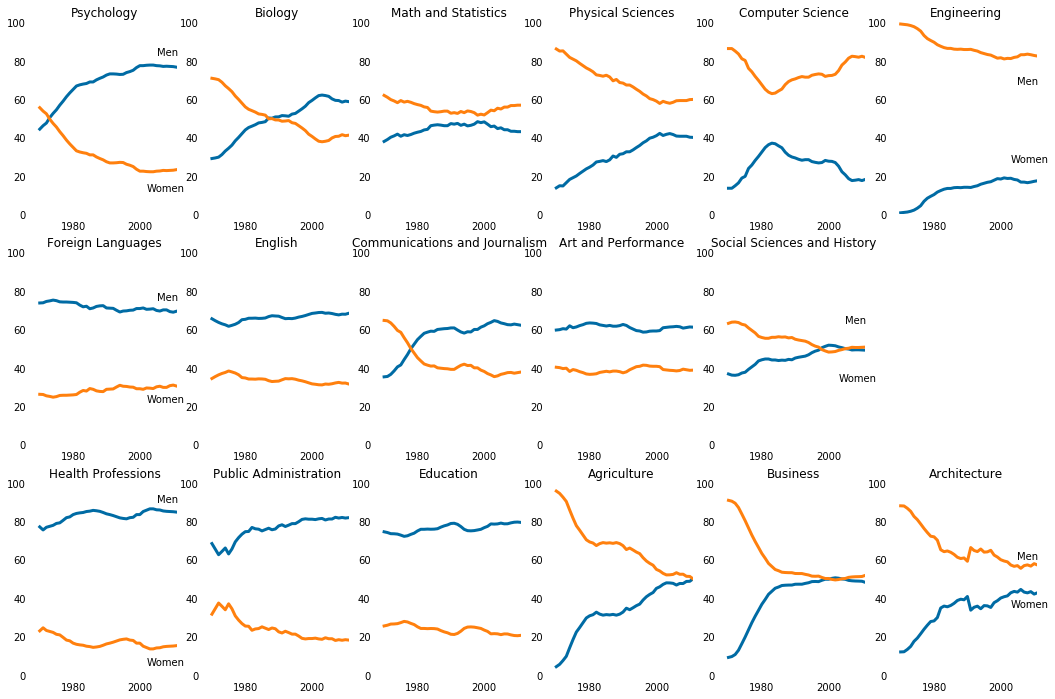

In [15]:
fig = plt.figure(figsize = (18,12))

# STEM Majors
for i in range(0,6):
    ax = fig.add_subplot(3, 6, i+1)
    ax.plot(women_degrees['Year'], women_stem[w_stem_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_stem[w_stem_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_stem_cats[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if i==5:
        ax.text(2005, 68, 'Men')
        ax.text(2003, 27, 'Women') 
    elif i==0:
        ax.text(2005, 83, 'Men')
        ax.text(2002, 12, 'Women')

# Liberal Arts Majors
for i in range(0,5):
    ax = fig.add_subplot(3, 6, i+7)
    ax.plot(women_degrees['Year'], women_lib_arts[w_lib_arts_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_lib_arts[w_lib_arts_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_lib_arts_cats[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if i==4:
        ax.text(2005, 63, 'Men')
        ax.text(2003, 33, 'Women') 
    elif i==0:
        ax.text(2005, 75, 'Men')
        ax.text(2002, 22, 'Women')

# Other Majors
for i in range(0,6):
    ax = fig.add_subplot(3, 6, i+13)
    ax.plot(women_degrees['Year'], women_other[w_other_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_other[w_other_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_other_cats[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if i==5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women') 
    elif i==0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')       

plt.show()

The non-data elements quickly clutter the field of view when we have 17 plots in one figure. One thing we can do is remove the x-axis labels for each line chart except for the bottom row. This is done by using the `labelbottom` parameter to `False` when calling `Axes.tickparams()` Additionally, the y-axis is has a lot of clutter, to reduce this we will display only the 0 and 100 axis label. This is done using the `Axes.set_yticks()` method becasue this method accepts a list object.

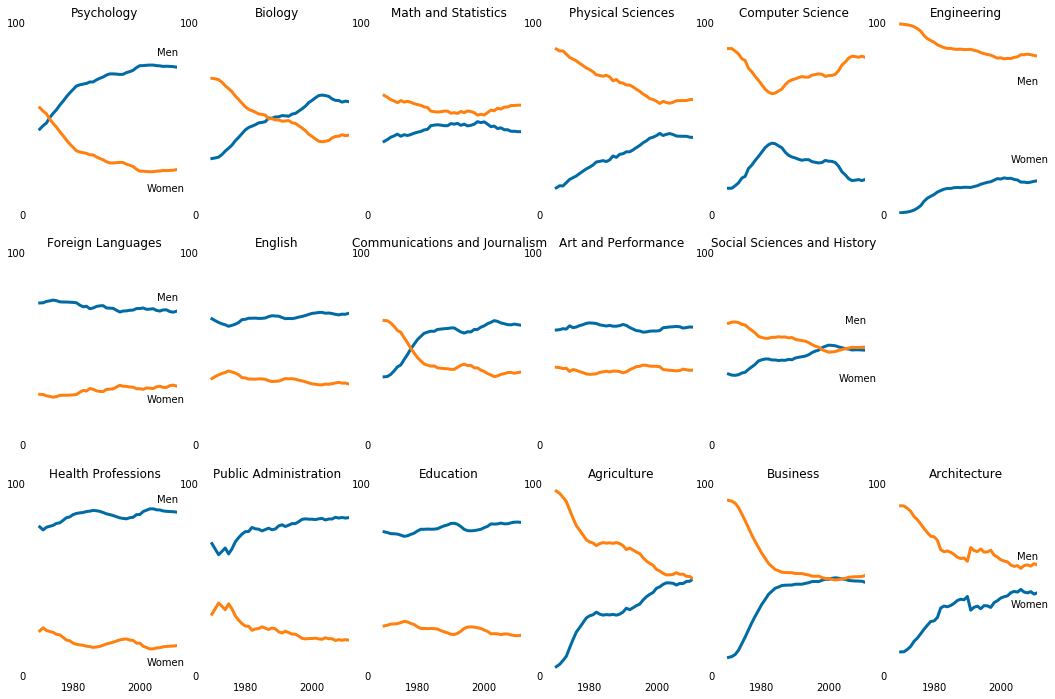

In [16]:
fig = plt.figure(figsize = (18,12))

# STEM Majors
for i in range(0,6):
    ax = fig.add_subplot(3, 6, i+1)
    ax.plot(women_degrees['Year'], women_stem[w_stem_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_stem[w_stem_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_stem_cats[i])
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if i==5:
        ax.text(2005, 68, 'Men')
        ax.text(2003, 27, 'Women') 
    elif i==0:
        ax.text(2005, 83, 'Men')
        ax.text(2002, 12, 'Women')

# Liberal Arts Majors
for i in range(0,5):
    ax = fig.add_subplot(3, 6, i+7)
    ax.plot(women_degrees['Year'], women_lib_arts[w_lib_arts_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_lib_arts[w_lib_arts_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_lib_arts_cats[i])
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if i==4:
        ax.text(2005, 63, 'Men')
        ax.text(2003, 33, 'Women') 
    elif i==0:
        ax.text(2005, 75, 'Men')
        ax.text(2002, 22, 'Women')

# Other Majors
for i in range(0,6):
    ax = fig.add_subplot(3, 6, i+13)
    ax.plot(women_degrees['Year'], women_other[w_other_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_other[w_other_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_other_cats[i])
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if i==5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women') 
    elif i==0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')       

plt.show()

Removing most of the y-axis labels made is hard to understand which degrees have a close to 50-50 gender breakdown. We can add a horizontal line across all of the line charts where the y-axis label `50` would have been. We do this by using the `Axes.axhline(y)` method where y is the y-axis location for the start of the line. We can also set the color of the line (`c`) and transparency of the line (0<`alpha`<1).  

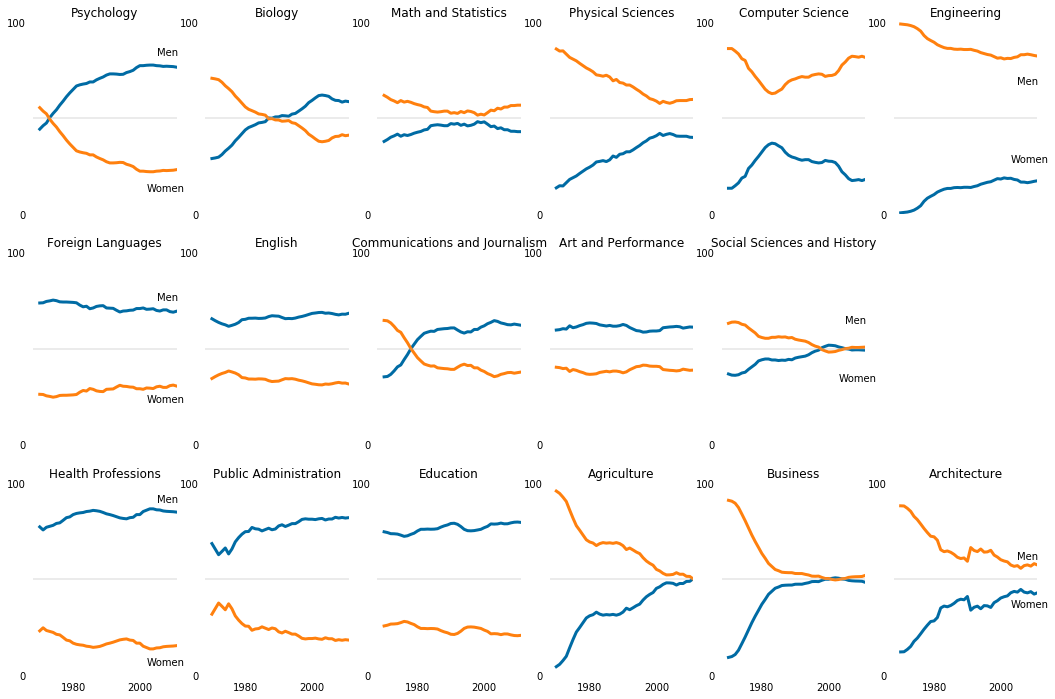

In [17]:
fig = plt.figure(figsize = (18,12))

# STEM Majors
for i in range(0,6):
    ax = fig.add_subplot(3, 6, i+1)
    ax.plot(women_degrees['Year'], women_stem[w_stem_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_stem[w_stem_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_stem_cats[i])
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if i==5:
        ax.text(2005, 68, 'Men')
        ax.text(2003, 27, 'Women') 
    elif i==0:
        ax.text(2005, 83, 'Men')
        ax.text(2002, 12, 'Women')

# Liberal Arts Majors
for i in range(0,5):
    ax = fig.add_subplot(3, 6, i+7)
    ax.plot(women_degrees['Year'], women_lib_arts[w_lib_arts_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_lib_arts[w_lib_arts_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_lib_arts_cats[i])
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if i==4:
        ax.text(2005, 63, 'Men')
        ax.text(2003, 33, 'Women') 
    elif i==0:
        ax.text(2005, 75, 'Men')
        ax.text(2002, 22, 'Women')

# Other Majors
for i in range(0,6):
    ax = fig.add_subplot(3, 6, i+13)
    ax.plot(women_degrees['Year'], women_other[w_other_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_other[w_other_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_other_cats[i])
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if i==5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women') 
    elif i==0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')       

plt.show()

If you import matplotlib and run `matplotlib.get_backend()` to see the specific backend you're currently using.

Whith the current backend we're using on Jupyter Notebook, we can use __[Figure.savefig()](https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.savefig)__ or __[pyplot.savefig()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig)__ to export all the plots contained in the figure as a single image file. NOTE: these have to be called before we display the figure using `pyplot.show()`.

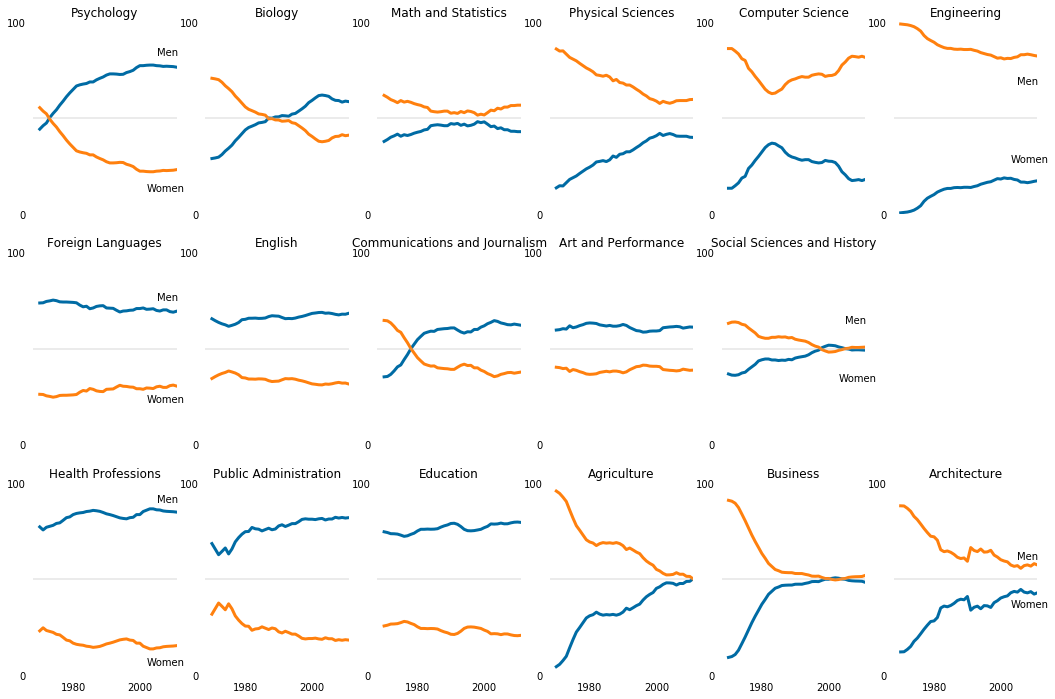

In [18]:
fig = plt.figure(figsize = (18,12))

# STEM Majors
for i in range(0,6):
    ax = fig.add_subplot(3, 6, i+1)
    ax.plot(women_degrees['Year'], women_stem[w_stem_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_stem[w_stem_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_stem_cats[i])
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if i==5:
        ax.text(2005, 68, 'Men')
        ax.text(2003, 27, 'Women') 
    elif i==0:
        ax.text(2005, 83, 'Men')
        ax.text(2002, 12, 'Women')

# Liberal Arts Majors
for i in range(0,5):
    ax = fig.add_subplot(3, 6, i+7)
    ax.plot(women_degrees['Year'], women_lib_arts[w_lib_arts_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_lib_arts[w_lib_arts_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_lib_arts_cats[i])
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if i==4:
        ax.text(2005, 63, 'Men')
        ax.text(2003, 33, 'Women') 
    elif i==0:
        ax.text(2005, 75, 'Men')
        ax.text(2002, 22, 'Women')

# Other Majors
for i in range(0,6):
    ax = fig.add_subplot(3, 6, i+13)
    ax.plot(women_degrees['Year'], women_other[w_other_cats[i]], label='Women', c=cb_dark_blue, linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_other[w_other_cats[i]], label='Men', c=cb_bright_orange, linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(w_other_cats[i])
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if i==5:
        ax.text(2005, 60, 'Men')
        ax.text(2003, 35, 'Women') 
    elif i==0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')       

plt.savefig('gender_degrees.png')
plt.show()